In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import mplhep as hep
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2

## Column values

In [81]:
data = pd.read_csv("output.txt", sep=';')
data

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR
0,0.700556,0.016885,0.299417,0.015314
1,0.687871,0.011883,0.312106,0.010837
2,0.687070,0.009761,0.312907,0.008884
3,0.694966,0.008409,0.305005,0.007646
4,0.693505,0.007486,0.306467,0.006822
...,...,...,...,...
495,0.699399,0.000743,0.300602,0.000683
496,0.699410,0.000742,0.300590,0.000682
497,0.699436,0.000725,0.300565,0.000666
498,0.699451,0.000741,0.300550,0.000681


## Information about every column

In [82]:
data.describe()

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR
count,500.000000,500.000000,500.000000,500.000000
mean,0.698921,0.001445,0.301065,0.001317
std,0.000904,0.001319,0.000902,0.001198
min,0.687070,0.000723,0.299417,0.000665
25%,0.698745,0.000855,0.300711,0.000782
50%,0.698996,0.001052,0.300995,0.000962
75%,0.699275,0.001482,0.301243,0.001345
max,0.700556,0.016885,0.312907,0.015314


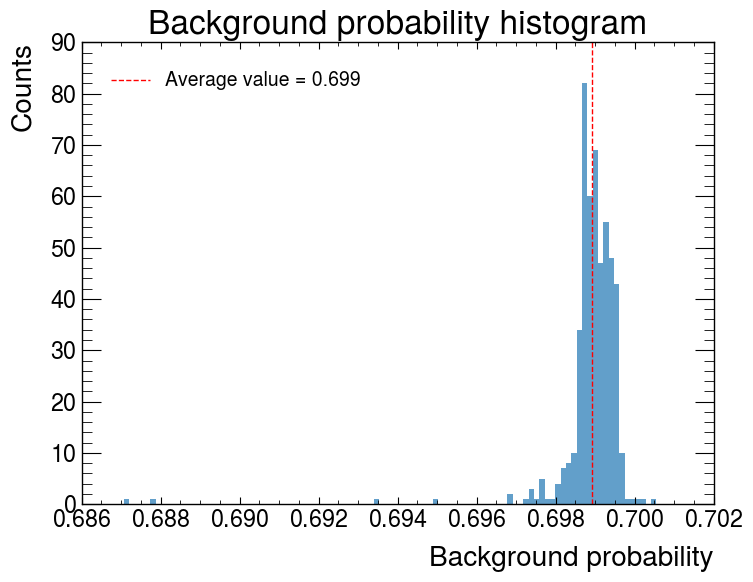

In [83]:
bkg = np.array(data['BKG PROBABILITY'])
bkg_mean = bkg.mean()

N = len(bkg)

plt.hist(bkg, bins=100, alpha=0.7)
plt.axvline(bkg_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(bkg_mean, 3)))
plt.xlabel("Background probability")
plt.ylabel("Counts")
plt.title("Background probability histogram")
plt.legend()

In [84]:
data.keys()

Index(['BKG PROBABILITY', ' BKG ERROR', ' SIGNAL PROBABILITY',
       ' SIGNAL ERROR'],
      dtype='object')

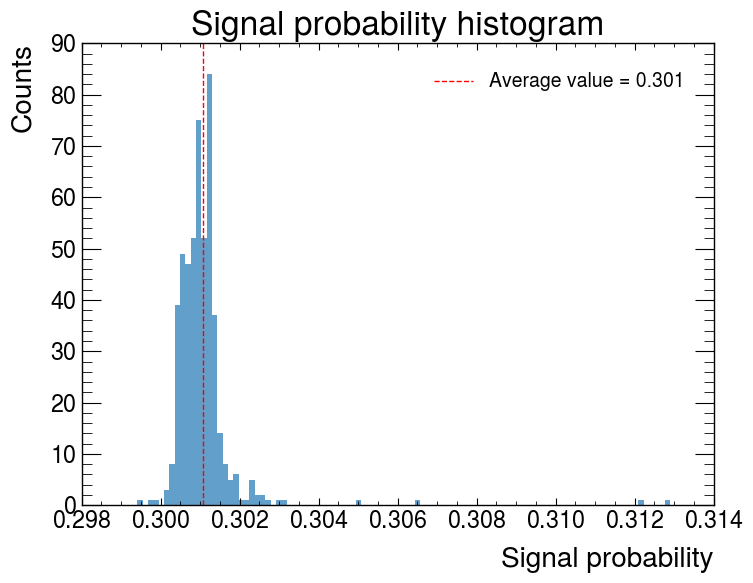

In [85]:
sig = np.array(data[' SIGNAL PROBABILITY'])
sig_mean = sig.mean()

plt.axvline(sig_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(sig_mean, 3)))
plt.hist(sig, bins=100, alpha=0.7)
plt.xlabel("Signal probability")
plt.ylabel("Counts")
plt.title("Signal probability histogram")
plt.legend()

## Correlation matrix between signal and background

<Axes: >

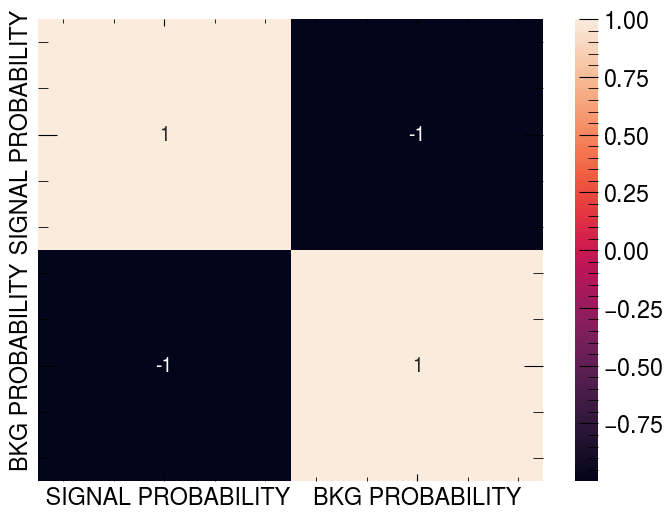

In [86]:
only_prob = data[[' SIGNAL PROBABILITY', 'BKG PROBABILITY']]
sns.heatmap(only_prob.corr(), annot=True)

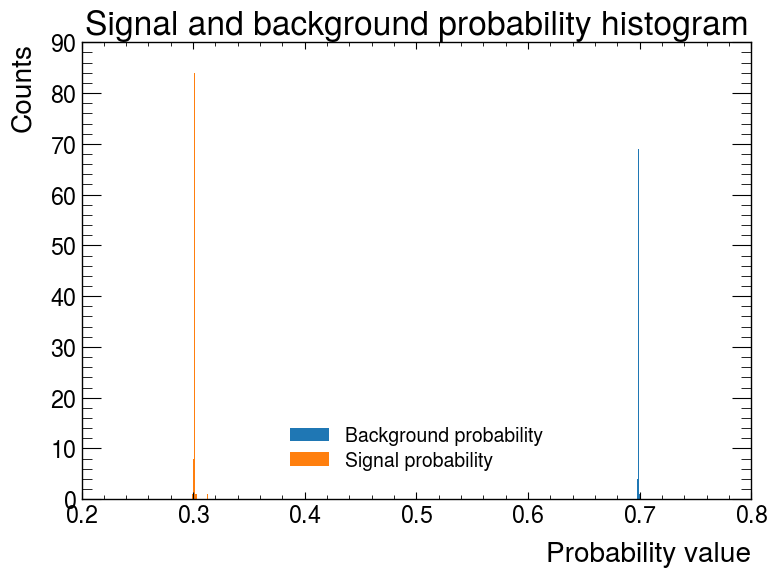

In [87]:
plt.hist(bkg, bins=100, label="Background probability")
plt.hist(sig, bins=100, label="Signal probability")
plt.xlabel("Probability value")
plt.ylabel("Counts")
plt.title("Signal and background probability histogram")
plt.legend()
plt.tight_layout()

## Root mean squared error RMS

In [88]:
rms_sig = np.sqrt(np.sum(sig**2)/N)
rms_bkg = np.sqrt(np.sum(bkg**2)/N)
print(rms_sig, rms_bkg)

0.3010662307340596 0.6989215308779577


## Average error

In [89]:
bkg_std = bkg.std()
sig_std = sig.std()

bkg_av_error = bkg_std / np.sqrt(N)
sig_av_error = sig_std / np.sqrt(N)

print(str(bkg_av_error), "Average bkg error")
print(str(sig_av_error), "Average sig error")

4.0367600109394654e-05 Average bkg error
4.030173048582405e-05 Average sig error


## Manual correlation coefficient

![Alt text](image.png)

In [90]:
def man_correlation(x, y, x_av, y_av):
    nominator = np.sum((x-x_av) * (y-y_av))
    denominator = np.sqrt(np.sum((x-x_av)**2)) * np.sqrt(np.sum((y-y_av)**2))
    
    result = nominator/denominator
    return result

total_corr = man_correlation(sig, bkg, sig_mean, bkg_mean)
print("Total correlation coefficient: ", total_corr)

Total correlation coefficient:  -0.9998412623923234


### Correlation coefficient, point by point

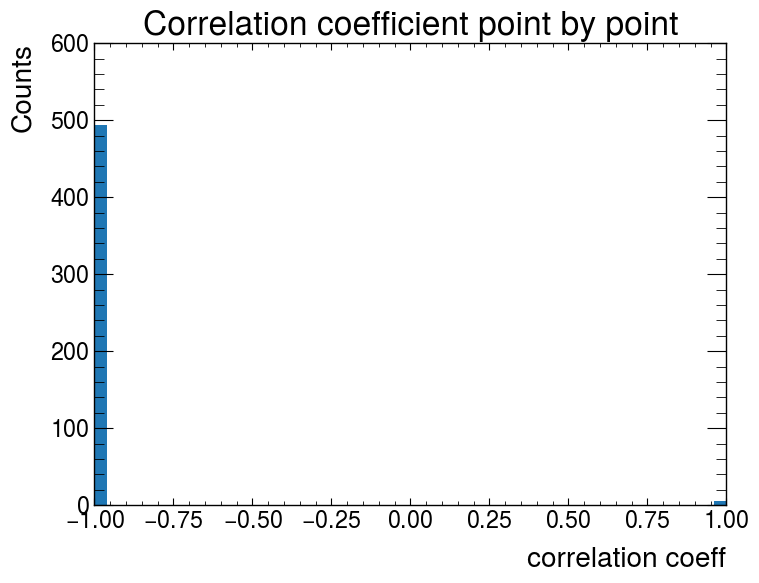

In [91]:
corr_coefficients = []
for i in range(N):
    res = man_correlation(sig[i], bkg[i], sig_mean, bkg_mean)
    corr_coefficients.append(res)
corr_coefficients = np.array(corr_coefficients)
plt.hist(corr_coefficients, bins=50)
plt.title("Correlation coefficient point by point")
plt.xlabel("correlation coeff")
plt.ylabel("Counts")

plt.savefig("corr_point_by_point.pdf")

## Residues and pulls

In [92]:
sig_err = data[' SIGNAL ERROR']
bkg_err = data[' BKG ERROR']

# from scipy.stats import norm

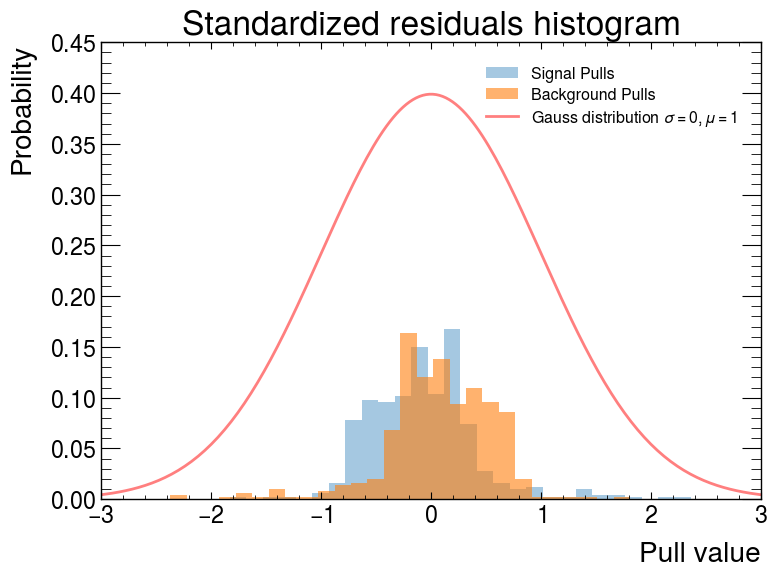

In [93]:
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming sig, bkg, sig_pred, and bkg_pred are defined
sig_pred = 0.3
bkg_pred = 0.7

# Calculate residuals
sig_residues = sig - sig_pred
bkg_residues = bkg - bkg_pred

# Calculate pulls (standardized residuals)
sig_pulls = (sig_residues - np.mean(sig_residues)) / np.std(sig_residues)
bkg_pulls = (bkg_residues - np.mean(bkg_residues)) / np.std(bkg_residues)

weights = np.ones_like(sig_pulls) / len(sig_pulls)

# Plot histograms of pulls
plt.hist(sig_pulls, bins=100, alpha=0.4, label='Signal Pulls', weights=weights)
plt.hist(bkg_pulls, bins=100, alpha=0.6, label='Background Pulls', weights=weights)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)
plt.xlim([-3, 3])
plt.xlabel("Pull value")
plt.ylabel("Probability")
plt.title('Standardized residuals histogram')
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
# Show legen
plt.show()


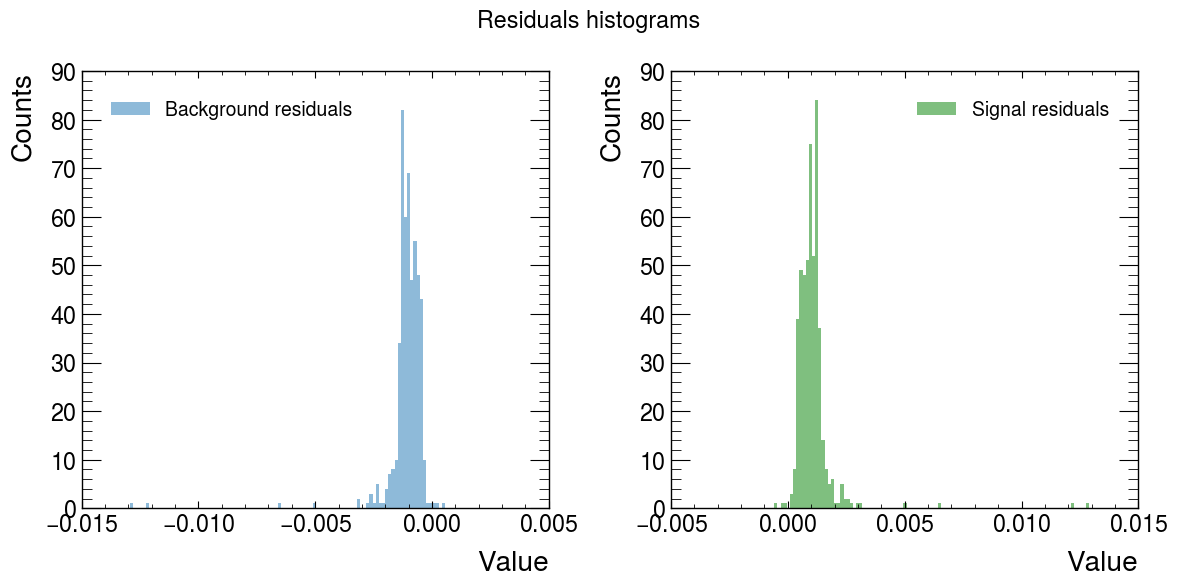

In [94]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed

plt.subplot(1, 2, 1)
plt.hist(bkg_residues, bins=100, alpha=0.5, label='Background residuals')
plt.ylabel("Counts")
plt.xlabel("Value")
plt.ticklabel_format(axis='x', style='plain')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sig_residues, bins=100, alpha=0.5, color='green', label='Signal residuals')
plt.ylabel("Counts")
plt.xlabel("Value")
plt.ticklabel_format(axis='x', style='plain')
plt.legend()

plt.suptitle("Residuals histograms")
plt.tight_layout()

plt.savefig("residuals.pdf")


## Standardised residuals other way

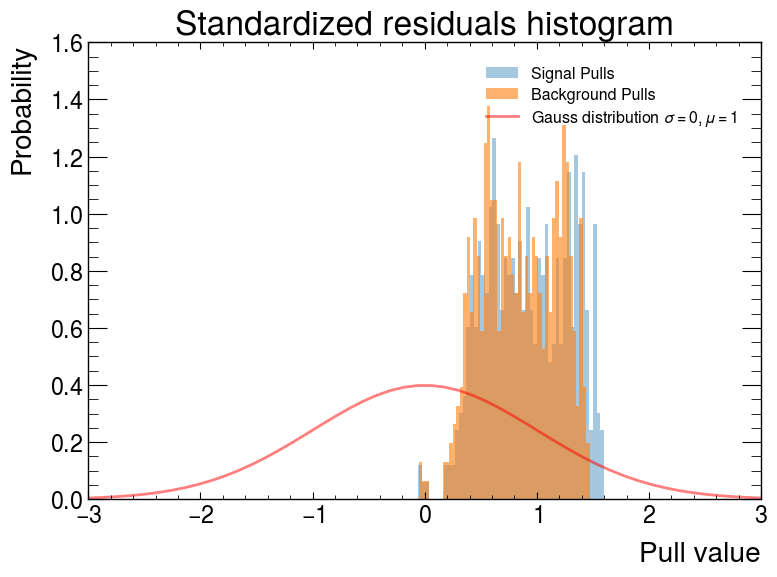

In [105]:
# Assuming sig, bkg, sig_pred, and bkg_pred are defined
sig_pred = 0.3
bkg_pred = 0.7

# Calculate residuals
sig_residues = sig - sig_pred
bkg_residues = bkg - bkg_pred

# Calculate pulls (standardized residuals)
sig_pulls = sig_residues / sig_err
bkg_pulls = sig_residues / bkg_err

weights = np.ones_like(sig_pulls) / len(sig_pulls)

# plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', weights=weights)
# plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', weights=weights)

plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', density=True, stacked=True)
plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', density=True, stacked=True)

plt.xlim([-3, 3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)

plt.xlabel("Pull value")
plt.ylabel("Probability")
plt.title('Standardized residuals histogram')
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
# Show legen
# plt.show()

plt.savefig('pulls.pdf')


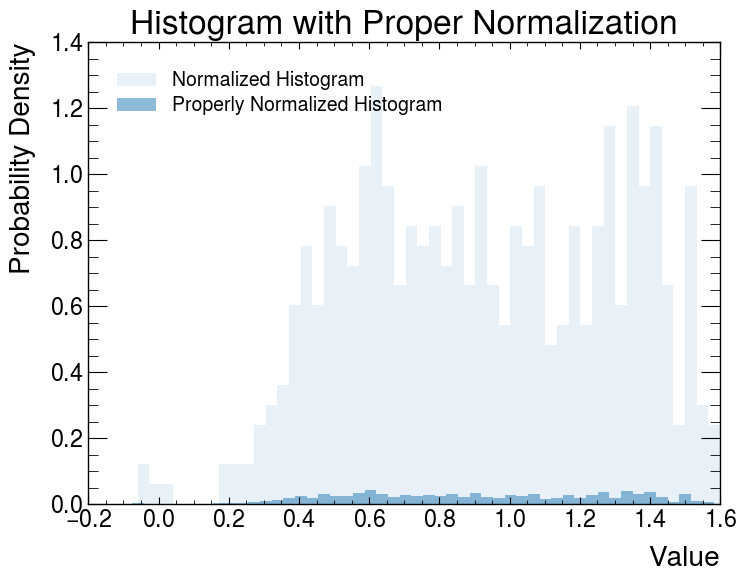

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data

# Create a histogram with density=True
hist, bin_edges, _ = plt.hist(sig_pulls, bins=50, density=True, alpha=0.1, label='Normalized Histogram')

# Calculate the bin widths
bin_widths = np.diff(bin_edges)

# Normalize the histogram by multiplying each bin's height by its width
hist_normalized = hist * bin_widths

# Plot the properly normalized histogram
plt.bar(bin_edges[:-1], hist_normalized, width=bin_widths, alpha=0.5, label='Properly Normalized Histogram')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram with Proper Normalization')
plt.legend()
plt.show()


## Scatter plot bkg sig

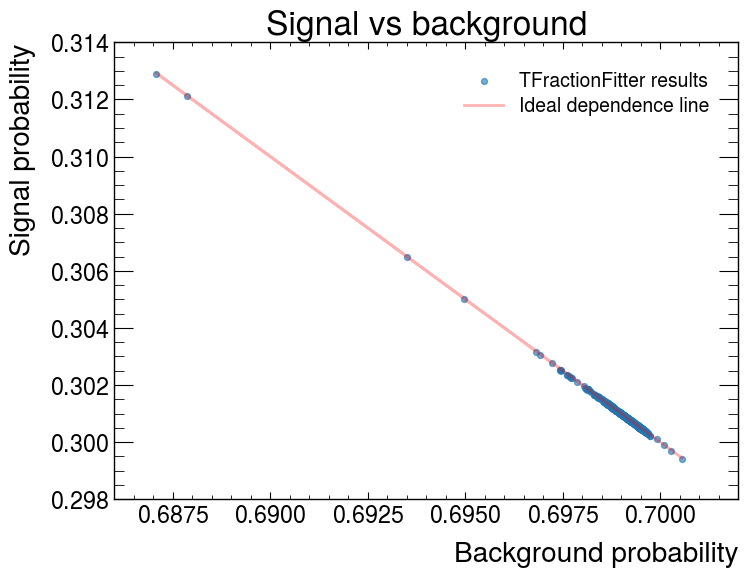

In [97]:
plt.scatter(bkg, sig, s=18, alpha=0.6, label='TFractionFitter results')
plt.xlabel("Background probability")
plt.ylabel("Signal probability")
plt.title("Signal vs background")
teo_sig = 1 - bkg
plt.plot(bkg, teo_sig, c='r', alpha=0.3, label='Ideal dependence line')
plt.legend()
plt.tight_layout()

plt.savefig("sig_vs_bkg.pdf")
